This code processes chlorophyll data from NJDEP. A file containing all data is 100MB.

The final processed code is analyzed in file 2.2 Chl Analysis and Model.

http://njdep.rutgers.edu/aircraft/

In [1]:
import numpy as np
import pandas as pd
import datetime
import urllib.request
import netCDF4
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Parse turns the data into Datetime format.
# Index sets the date as the index - this step is important in later data condensing.
njdep = pd.read_csv('./NJDEPaircraftData20070101_To_20191001.txt',parse_dates=['date'], index_col='date')
njdep = njdep.drop('id', axis=1)
njdep = njdep.drop('time', axis=1)
njdep.head(10)

,lat,lng,chlora
date,,,
2007-05-21,40.463245,-74.235184,2.117404
2007-05-21,40.462158,-74.234329,1.384279
2007-05-21,40.461193,-74.233322,1.429075
2007-05-21,40.460308,-74.232178,1.494683
2007-05-21,40.459473,-74.230965,1.515220
2007-05-21,40.458725,-74.229668,1.678402
2007-05-21,40.458012,-74.228325,1.391031
2007-05-21,40.457371,-74.226936,1.541263
2007-05-21,40.456776,-74.225525,1.407845


In [3]:
# NJ is around 40 N/S and -74 E/W
# must trim out some bad data
njdep = njdep[njdep.lat>38.5]

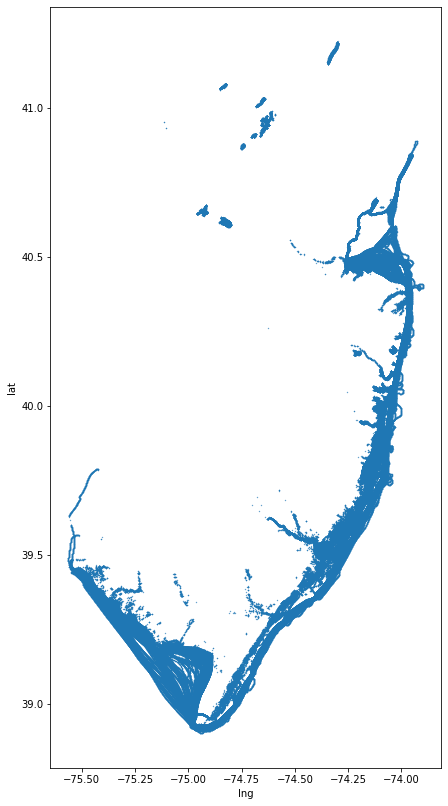

In [4]:
# This code plots a map of all points along New Jersey, but it takes a long time to process
# figure displays 3.5 deg n/s and 2 deg e/w
njdep.plot.scatter('lng','lat',figsize=(7, 14), s=0.1)

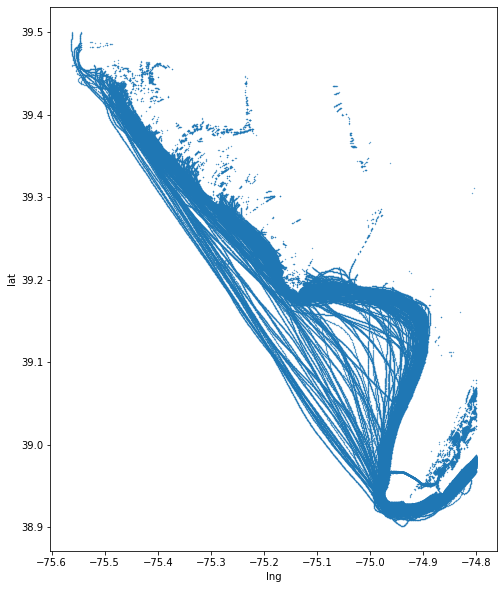

In [5]:
# delaware bay is lon <-74.8 roughly
subset = njdep[njdep.lng<-74.8]
subset = subset[subset.lat>38.5]
subset = subset[subset.lat<39.5]
# figure displays 1.0 deg n/s and 0.8 deg e/w
subset.plot.scatter('lng','lat',figsize=(8, 10),s=0.1) #s controls data point dot size

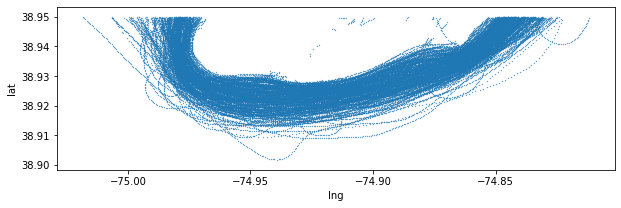

In [6]:
# This code redefines our dataframe to be only this subset of the delbay
north = 38.95
# south = 39.05
# east = -75.0
# west = -75.1

# cape_may = subset[(subset.lng<east) & (subset.lng>west) & (subset.lat<north) & (subset.lat>south)]
cape_may = subset[(subset.lat<north)]


cape_may.plot.scatter('lng','lat',figsize=(10, 3),s=0.1)

In [7]:
# This creates a new dataframe where the all the data points from a single day are averaged into a single point. 
# This may be a little heavy-handed
cape_may_avg = cape_may.resample('D').mean()
cape_may_avg

,lat,lng,chlora
date,,,
2007-05-24,38.932710,-74.893840,1.677523
2007-05-25,NaN,NaN,NaN
2007-05-26,NaN,NaN,NaN
2007-05-27,NaN,NaN,NaN
2007-05-28,NaN,NaN,NaN
...,...,...,...
2019-09-25,NaN,NaN,NaN
2019-09-26,38.931541,-74.917041,10.019888
2019-09-27,NaN,NaN,NaN


In [8]:
# Drop all the NaN values
cape_may_avg = cape_may_avg.dropna(axis=0,how="any")
cape_may_avg

,lat,lng,chlora
date,,,
2007-05-24,38.932710,-74.893840,1.677523
2007-06-07,38.930563,-74.899641,1.743167
2007-06-14,38.928998,-74.899691,2.050574
2007-06-24,38.929603,-74.898906,2.026673
2007-07-01,38.930112,-74.899750,3.781711
...,...,...,...
2019-09-08,38.929120,-74.917488,10.062725
2019-09-12,38.928275,-74.915832,13.628688
2019-09-22,38.930010,-74.914887,11.486931


In [9]:
# If you look at the headers of the previous tables, you will see that the column names aren't aligned correctly.
# Alignment is necessary to call the column data. Resetting the index corrects the formatting, but changes the index.
cape_may_avg = cape_may_avg.reset_index()
cape_may_avg

,date,lat,lng,chlora
0,2007-05-24,38.932710,-74.893840,1.677523
1,2007-06-07,38.930563,-74.899641,1.743167
2,2007-06-14,38.928998,-74.899691,2.050574
3,2007-06-24,38.929603,-74.898906,2.026673
4,2007-07-01,38.930112,-74.899750,3.781711
...,...,...,...,...
236,2019-09-08,38.929120,-74.917488,10.062725
237,2019-09-12,38.928275,-74.915832,13.628688
238,2019-09-22,38.930010,-74.914887,11.486931
239,2019-09-26,38.931541,-74.917041,10.019888


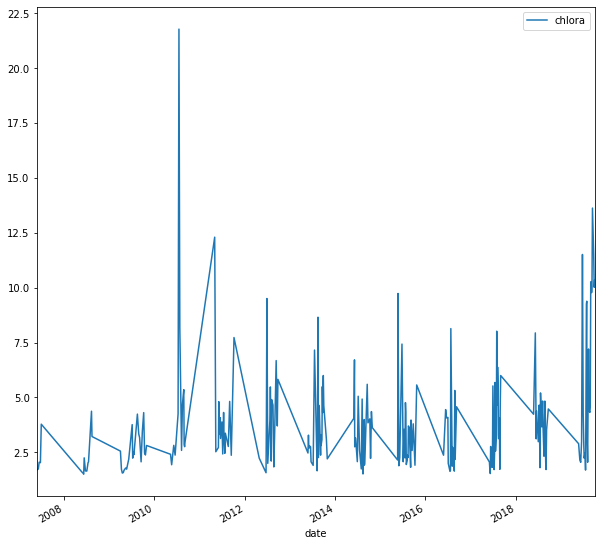

In [10]:
plot1 = cape_may_avg.plot('date','chlora',figsize=(10, 10)) #style='.'

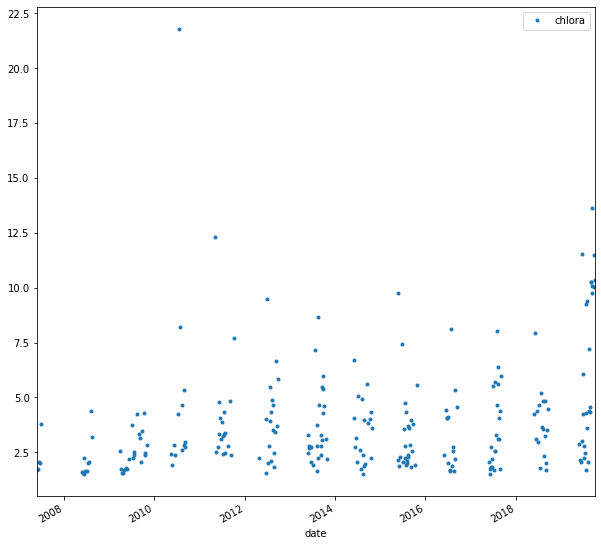

In [11]:
plot2 = cape_may_avg.plot('date','chlora',figsize=(10, 10), style='.') #

(735964.0, 736695.0)

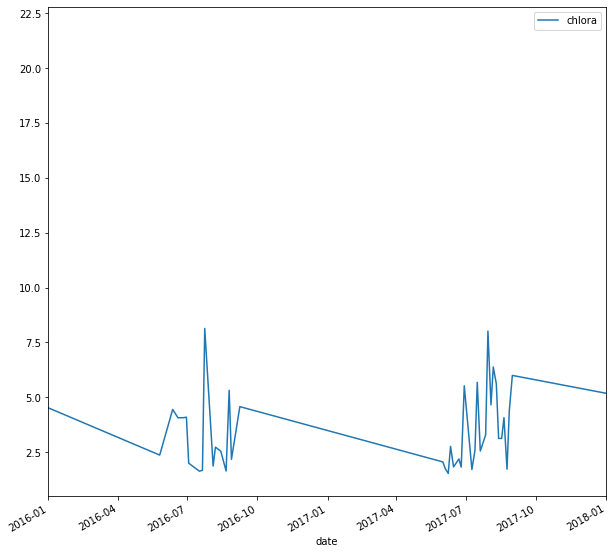

In [12]:
plot1 = cape_may_avg.plot('date','chlora',figsize=(10, 10)) #style='.'
plot1.set_xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2018-01-01'))

(736450.0, 736603.0)

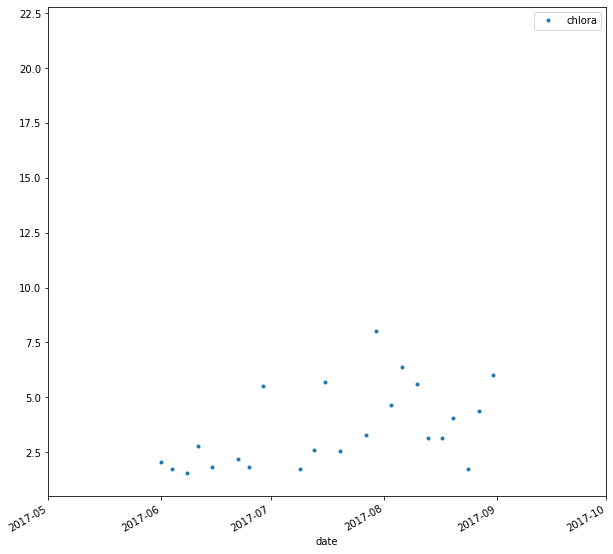

In [13]:
plot1 = cape_may_avg.plot('date','chlora',figsize=(10, 10),style='.') #style='.'
plot1.set_xlim(pd.Timestamp('2017-05-01'), pd.Timestamp('2017-10-01'))

In [14]:
cape_may_avg.size

964

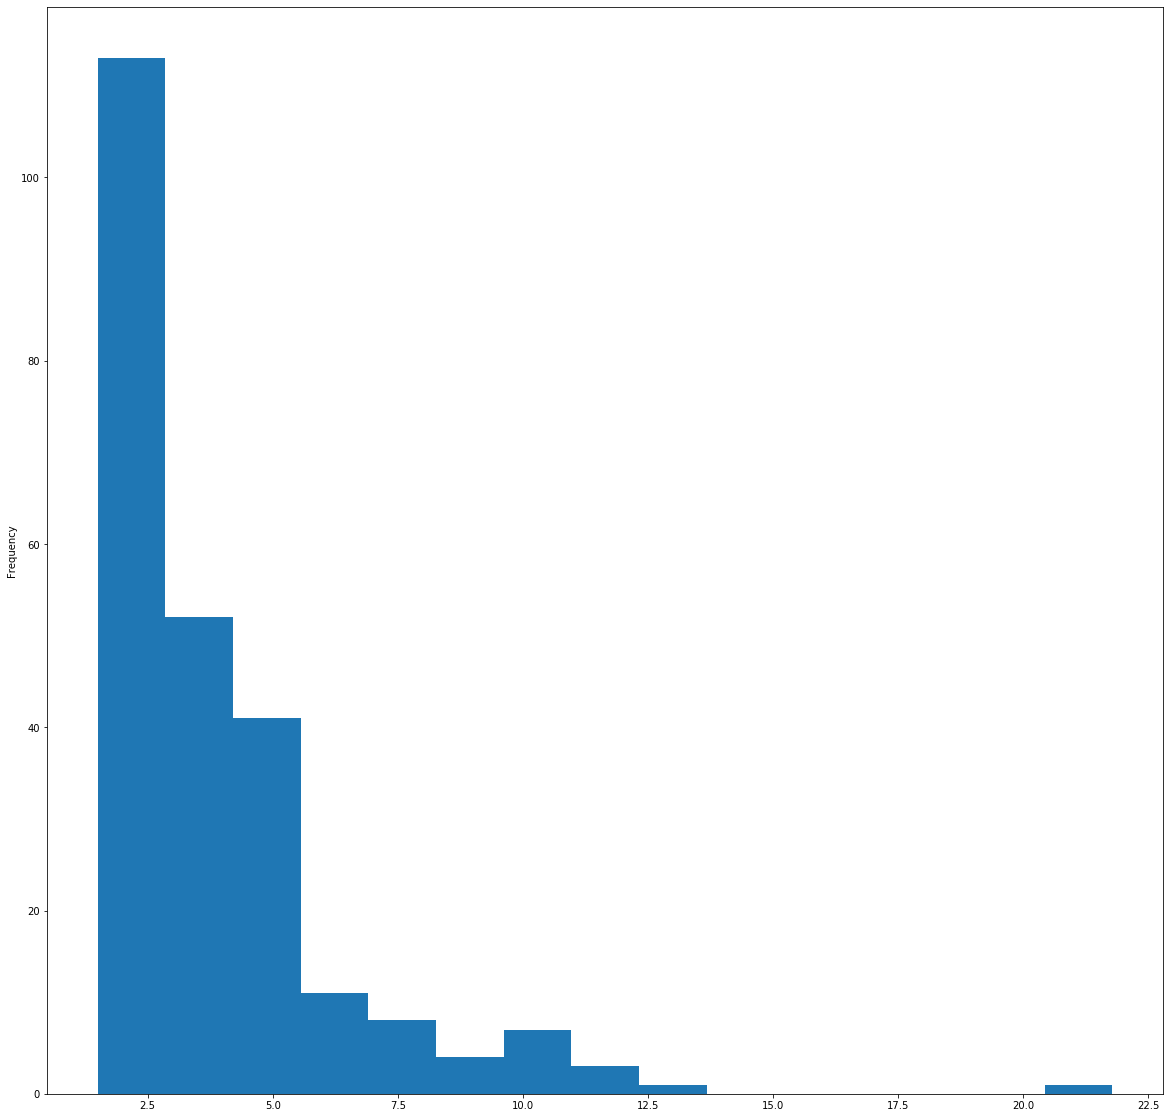

In [15]:
cape_may_avg['chlora'].plot.hist(bins=15, figsize=(20, 20))